##1.라이브러리 & 폰트 설정

###라이브러리 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#칼럼 중간 잘리지 않게

pd.set_option('display.max_rows', None)

###한글화 폰트 설정

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

##2.파일 업로드

In [5]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kJwY2WWf8Oq1RKd_w6lZ7D3jofJLdZYB', encoding='cp949')

In [6]:
df.head()

,지역,12.Jan,12.Feb,12.Mar,12.Apr,12.May,12.Jun,12.Jul,12.Aug,12.Sep,...,20.Sep,20.Oct,20.Nov,20.Dec,21.Jan,21.Feb,21.Mar,21.Apr,21.May,21.Jun
0,전국,264474.0,264035.0,263470.0,262630.0,261823.0,260425.0,258959.0,257163.0,255680.0,...,386235.0,387973.0,391180.0,396418.0,401083.0,406808.0,410921.0,414983.0,419019.0,426064.0
1,수도권,365249.0,364275.0,362790.0,360918.0,359253.0,356737.0,354214.0,350990.0,348174.0,...,554605.0,556292.0,559427.0,564152.0,569996.0,578553.0,584631.0,590858.0,596817.0,607706.0
2,지방권,163394.0,163491.0,163849.0,164044.0,164096.0,163820.0,163416.0,163052.0,162905.0,...,227820.0,229605.0,232881.0,238600.0,242156.0,245216.0,247481.0,249507.0,251732.0,255160.0
3,6대광역시,195186.0,194989.0,195093.0,195037.0,194851.0,194273.0,193523.0,192675.0,192214.0,...,298907.0,301505.0,306330.0,313976.0,319357.0,324733.0,329139.0,333113.0,337314.0,343728.0
4,5대광역시,190421.0,190312.0,190555.0,190603.0,190631.0,190183.0,189587.0,188896.0,188635.0,...,292516.0,295565.0,301179.0,310102.0,315661.0,320582.0,324076.0,326852.0,330023.0,335004.0


##3.데이터 전처리

In [7]:
#NaN 개수 확인

df.isna().sum()

지역        0
12.Jan    7
12.Feb    7
12.Mar    7
12.Apr    7
12.May    7
12.Jun    7
12.Jul    7
12.Aug    7
12.Sep    7
12.Oct    7
12.Nov    7
12.Dec    7
13.Jan    7
13.Feb    7
13.Mar    7
13.Apr    7
13.May    7
13.Jun    7
13.Jul    7
13.Aug    7
13.Sep    7
13.Oct    7
13.Nov    7
13.Dec    7
14.Jan    7
14.Feb    7
14.Mar    7
14.Apr    7
14.May    7
14.Jun    7
14.Jul    6
14.Aug    6
14.Sep    6
14.Oct    6
14.Nov    6
14.Dec    6
15.Jan    6
15.Feb    6
15.Mar    6
15.Apr    6
15.May    6
15.Jun    6
15.Jul    6
15.Aug    6
15.Sep    6
15.Oct    6
15.Nov    6
15.Dec    6
16.Jan    6
16.Feb    6
16.Mar    6
16.Apr    6
16.May    6
16.Jun    6
16.Jul    9
16.Aug    9
16.Sep    9
16.Oct    9
16.Nov    9
16.Dec    9
17.Jan    9
17.Feb    9
17.Mar    9
17.Apr    9
17.May    9
17.Jun    9
17.Jul    9
17.Aug    9
17.Sep    9
17.Oct    9
17.Nov    9
17.Dec    9
18.Jan    9
18.Feb    9
18.Mar    9
18.Apr    9
18.May    9
18.Jun    9
18.Jul    9
18.Aug    9
18.Sep    9
18.Oct    9
18.N

In [8]:
#NaN 행 삭제

df = df.dropna()

In [9]:
#행렬 전환

df = df.rename({'지역' : '날짜'}, axis=1)
df = df.set_index('날짜')
df = df.transpose()
df.head()

날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
12.Jan,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
12.Feb,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
12.Mar,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
12.Apr,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
12.May,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


In [10]:
#필요한 칼럼만 추출
#전국, 6대광역시, 서울, 경기

df = df[['전국', '서울', '경기', '6대광역시']]
df.head()

날짜,전국,서울,경기,6대광역시
12.Jan,264474.0,540954.0,283106.0,195186.0
12.Feb,264035.0,538876.0,282765.0,194989.0
12.Mar,263470.0,536079.0,281913.0,195093.0
12.Apr,262630.0,532409.0,280914.0,195037.0
12.May,261823.0,529733.0,279776.0,194851.0


In [11]:
#dytpe int로 변환

df_m = df.astype(int)
df_m.head()

날짜,전국,서울,경기,6대광역시
12.Jan,264474,540954,283106,195186
12.Feb,264035,538876,282765,194989
12.Mar,263470,536079,281913,195093
12.Apr,262630,532409,280914,195037
12.May,261823,529733,279776,194851


##4.시각화

###표 형식

In [12]:
df_m

날짜,전국,서울,경기,6대광역시
12.Jan,264474,540954,283106,195186
12.Feb,264035,538876,282765,194989
12.Mar,263470,536079,281913,195093
12.Apr,262630,532409,280914,195037
12.May,261823,529733,279776,194851
12.Jun,260425,525131,278318,194273
12.Jul,258959,521123,276513,193523
12.Aug,257163,515846,274251,192675
12.Sep,255680,511823,271879,192214
12.Oct,254426,508217,269861,191889


###그래프 형식

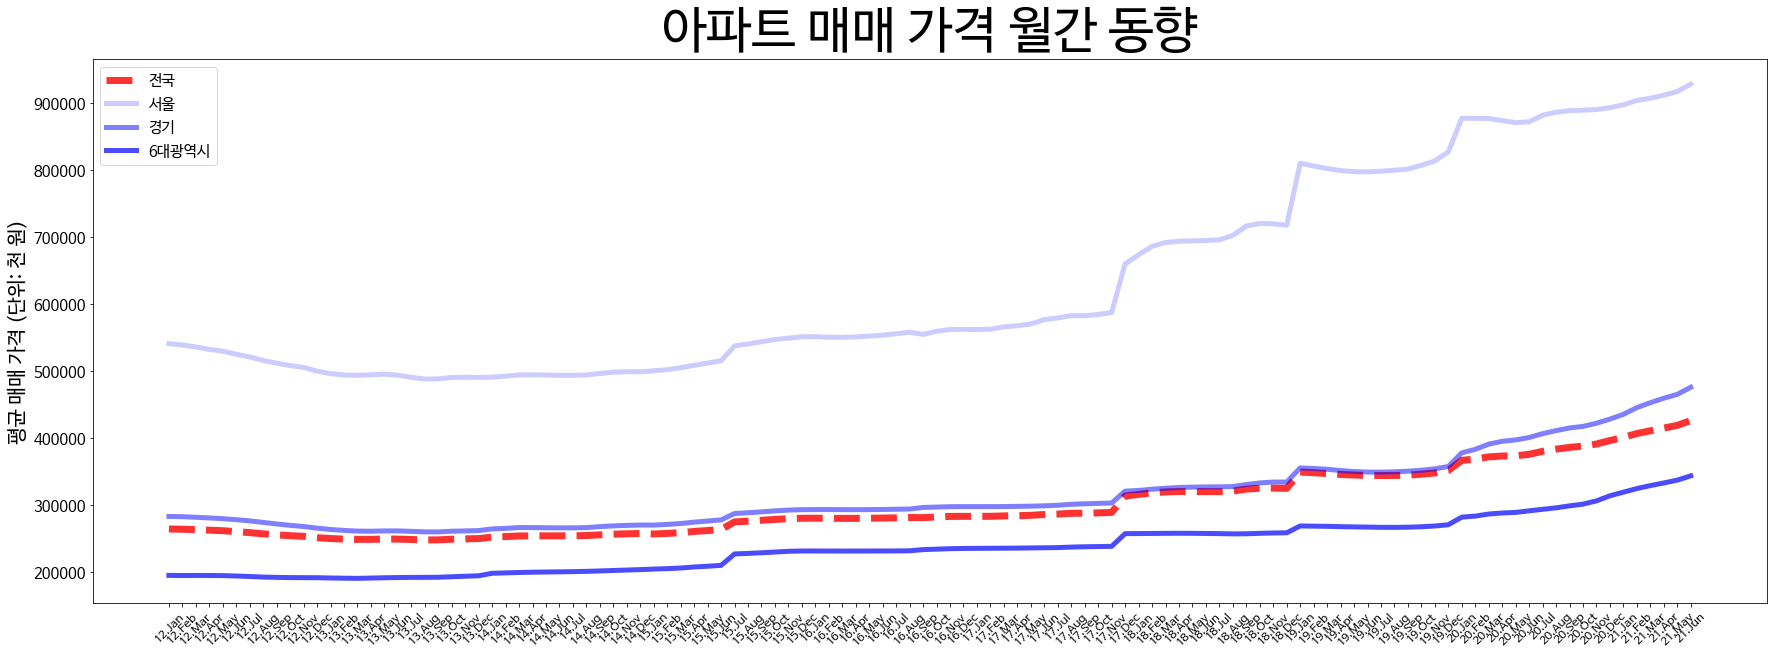

In [81]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(df_m['전국'], linestyle='--', color="#FF3232", linewidth='7')
ax.plot(df_m['서울'], color="b", alpha=0.2, linewidth='5')
ax.plot(df_m['경기'], color="b", alpha=0.5, linewidth='5')
ax.plot(df_m['6대광역시'], color='b', alpha=0.7, linewidth='5')

ax.set_ylabel("평균 매매 가격 (단위: 천 원)", fontsize=20)



plt.title('아파트 매매 가격 월간 동향', fontsize=50)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=15)

plt.legend(['전국', '서울', '경기', '6대광역시'], fontsize=15)

plt.show()